Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo;

 a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 dataset" scaricare il dataset nel formato che si preferisce.
 
  • Si richiede di verificare le dimensioni del dataset e i relativi metadati; Download our complete COVID-19 
  
  • Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 
  
  • Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente); 
  
  • Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali; 
  
  • Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 
   
   Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [85]:
# -------Si richiede di verificare le dimensioni del dataset e i relativi metadati.--------------------

import pandas as pd
import matplotlib.pyplot as plt

# carico il file csv nel dataframe

file = pd.read_csv('owid-covid-data.csv')

df=pd.DataFrame(file)

df = df

print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
402804      ZWE    Africa     Zimbabwe  2024-05-15     266362.0        0.0   
402805      ZWE    Africa     Zimbabwe  2024-05-16     266362.0        0.0   
402806      ZWE    Africa     Zimbabwe  2024-05-17     266362.0        0.0   
402807      ZWE    Africa     Zimbabwe  2024-05-18     266362.0        0.0   
402808      ZWE    Africa     Zimbabwe  2024-05-19     266362.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [86]:
# vogliamo vedere quante righe e colonne ci sono nel nostro database, ci permette di vedere le Dimensioni del dataset

df.shape

(402809, 67)

In [87]:
# i metadati

df.info()

# fornisce un riepilogo informativo del DataFrame, inclusi il numero di colonne, i loro nomi, il tipo di dati, e il numero di valori non nulli

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402809 entries, 0 to 402808
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402809 non-null  object 
 1   continent                                   383508 non-null  object 
 2   location                                    402809 non-null  object 
 3   date                                        402809 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [88]:
print(df.columns.tolist())

# ho convertito i nomi delle colonne in una lista 

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [89]:
df.head() # guardo le prime 5 righe del mio data frame

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [90]:
#-------- Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 


df_continent = df.dropna(subset=['continent']) # filtro il dataset per escludere le locazioni che non fanno parte ad alcun continente

casi_totali_continente = df_continent.groupby('continent')['total_cases'].sum().reset_index() # calcolo il numero di casi totali per continente


print(casi_totali_continente)

       continent   total_cases
0         Africa  1.360475e+10
1           Asia  2.289547e+11
2         Europe  2.172971e+11
3  North America  1.175176e+11
4        Oceania  1.044462e+10
5  South America  6.819703e+10


In [91]:
# --------Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: 
# --------valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);


totale_casi_mondiali = df['total_cases'].sum() # calcolo la somma di tutti i casi mondiali

print(totale_casi_mondiali)

2780076646107.0


In [92]:
def calculate_statistics(continent_name): # creo una funzione per cui, dato un continent_name filtrami le colonne contenenti quel nome insieme ai sui casi totali, prendimi il valore massimo,
    continent_data = df[df['continent'] == continent_name]['total_cases'] # prendimi la media, calcolami la percentuale facendo la somma dei casi per il continent_name rispetto ai casi totali mondiali
    max_value = continent_data.max()
    mean_value = continent_data.mean()
    percent_world_cases = (continent_data.sum() / totale_casi_mondiali) * 100
    return max_value, mean_value, percent_world_cases

continente1 = 'Europe'         # creo due variabili con due nomi continenti
continente2 = 'Asia'

calculate_statistics(continente1)

max1, mean1, percent1 = calculate_statistics(continente1)  # le faccio girare nella funzione che mi ritonerà in ordine il max, la media e la percentuale
max2, mean2, percent2 = calculate_statistics(continente2)


print(f"Statistiche per {continente1} e {continente2}:")
print(f"  Valore massimo: {continente1} = {max1}  {continente2} = {max2}  ")
print(f"  Media: {continente1} = {mean1}   {continente2} = {mean2}")
print(f"  Percentuale rispetto ai casi totali nel mondo {continente1}: {percent1}%")
print(f"  Percentuale rispetto ai casi totali nel mondo {continente2}: {percent2}%")

Statistiche per Europe e Asia:
  Valore massimo: Europe = 38997490.0  Asia = 99357895.0  
  Media: Europe = 2762450.796226847   Asia = 3327539.853501148
  Percentuale rispetto ai casi totali nel mondo Europe: 7.816228462128401%
  Percentuale rispetto ai casi totali nel mondo Asia: 8.235553774411583%


In [93]:
#  --------Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
# ---------Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
# ---------Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

df['date'] = pd.to_datetime(df['date']) # converto la colonna date in oggetti datetime per permettermi di lavorare meglio con il filtraggio temporale

df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy() # filtro i dati per l'italia nel 2022, creo una copia copy() per evitare l'errore 'SettingWithCopyWarning' nel 
                                                                                       # nel momento in cui farò la creazione della colonna dei nuovi casi con le somme comulative 
print(df_italia_2022)

       iso_code continent location       date  total_cases  new_cases  \
173121      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
173122      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
173123      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
173124      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
173125      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
173481      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
173482      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
173483      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
173484      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
173485      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173121           36797.000      136530.0      

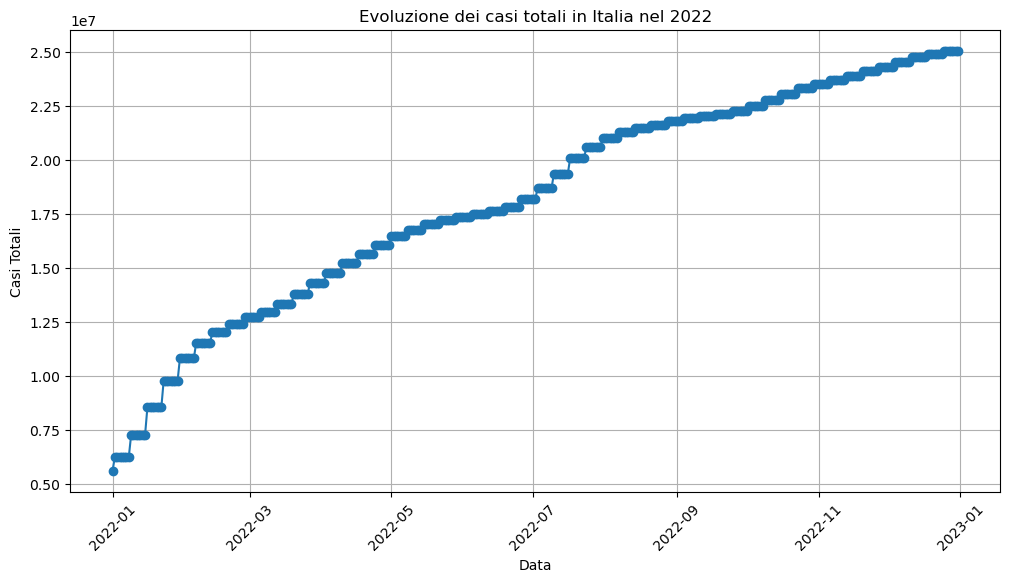

In [94]:
# creo un grafico dell' andamento evolutivo dei casi totali rispetto alla data

plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['total_cases'], marker='o', linestyle='-')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

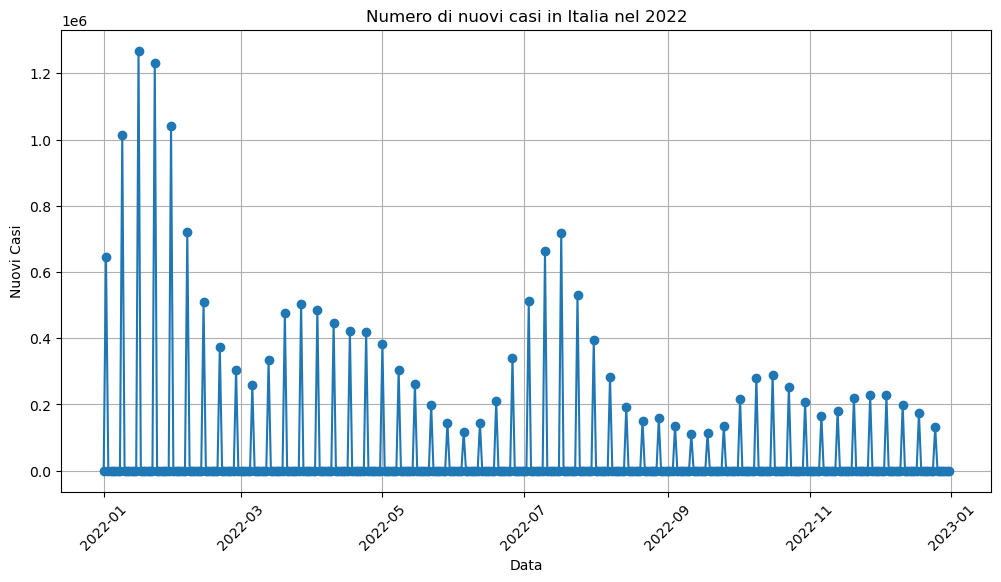

In [95]:
# creo grafico con i nuovi casi per data 

plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['new_cases'], marker='o', linestyle='-')
plt.title('Numero di nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

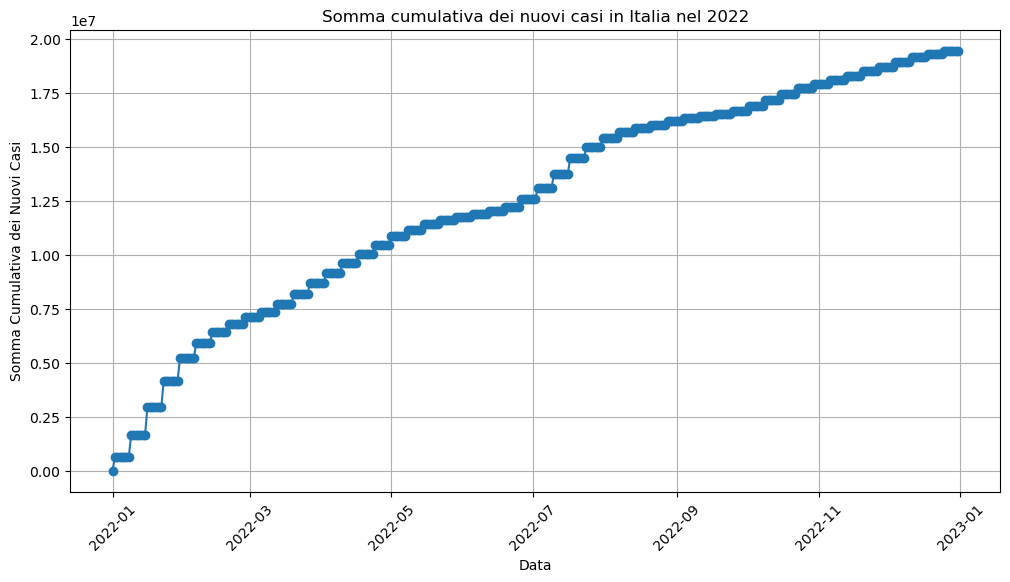

In [96]:
# faccio il calcolo delle somme comulative dei nuovi casi creando una nuova colonna
df_italia_2022.loc[:, 'cumulative_new_cases'] = df_italia_2022['new_cases'].cumsum()

# faccio il grafico dell'andamento delle somme comulative dei nuovi casi nel corso del tempo
plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['cumulative_new_cases'], marker='o', linestyle='-')
plt.title('Somma cumulativa dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa dei Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# possiamo notare un andamento crescente, poichè viene rappresentato l'accumulo dei nuovi casi nel tempo

In [97]:
#-------- Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU)
#-------- da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo



nazioni = ['Italy', 'Germany', 'France']
inizio = '2022-05-01'
fine = '2023-04-30'
df_filtro = df[(df['location'].isin(nazioni)) & (df['date'] >= inizio) & (df['date'] <= fine )] # creo un filtro che mi prendra solo le nazioni designate e le date comprese tra inizio e fine

<Figure size 1200x600 with 0 Axes>

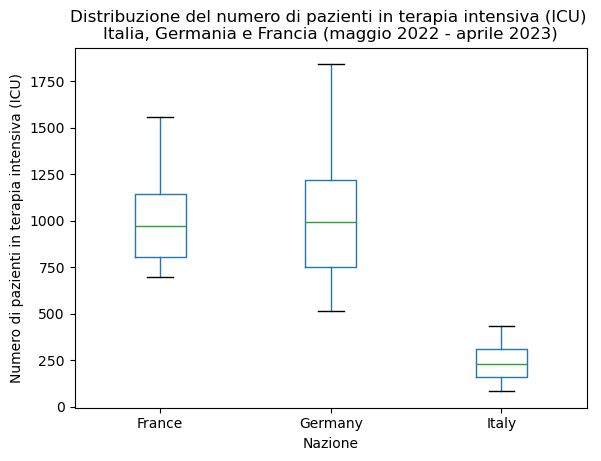

In [98]:
# creo un grafico di tipo boxplot  con il numero dei pazienti in terapia intensiva di Francia Germania e Italia

plt.figure(figsize=(12, 6))
df_filtro.boxplot(column='icu_patients', by='location', grid=False)
plt.title('Distribuzione del numero di pazienti in terapia intensiva (ICU) \nItalia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.suptitle('')  # Rimuove il titolo automatico del boxplot
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.show()

In [99]:
#-------- Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — 
#-------- se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

new_filtro = ((df['date'].dt.year == 2023) & 
          (df['location'].isin(['Italy', 'Germany', 'France', 'Spain']))) # creo un filtro con la data 2023 e le location selezionate

dati_filtrati = df[new_filtro]

print(dati_filtrati)

       iso_code continent location       date  total_cases  new_cases  \
122364      FRA    Europe   France 2023-01-01   38141254.0   151707.0   
122365      FRA    Europe   France 2023-01-02   38141254.0        0.0   
122366      FRA    Europe   France 2023-01-03   38141254.0        0.0   
122367      FRA    Europe   France 2023-01-04   38141254.0        0.0   
122368      FRA    Europe   France 2023-01-05   38141254.0        0.0   
...         ...       ...      ...        ...          ...        ...   
340991      ESP    Europe    Spain 2023-12-27   13980340.0        NaN   
340992      ESP    Europe    Spain 2023-12-28   13980340.0        NaN   
340993      ESP    Europe    Spain 2023-12-29   13980340.0        NaN   
340994      ESP    Europe    Spain 2023-12-30   13980340.0        NaN   
340995      ESP    Europe    Spain 2023-12-31   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
122364           21672.429      162475.0      

In [100]:
somma_ospedalizzati = dati_filtrati.groupby('location')['hosp_patients'].sum() # faccio un raggruppamento con i dati filtrati delle colonne desiderate, ovvero location e ospedalizzati, di questi ultimi fammi la somma

print("Somma dei pazienti ospitalizzati per nazione nel 2023:")
print(somma_ospedalizzati)


Somma dei pazienti ospitalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [101]:
# notiamo che i valori di Germany sono uguali a 0

filtro_germania = df['location'] == 'Germany' 

filtro_germania = df[filtro_germania]




print(filtro_germania)

       iso_code continent location       date  total_cases  new_cases  \
130854      DEU    Europe  Germany 2020-01-05          1.0        1.0   
130855      DEU    Europe  Germany 2020-01-06          1.0        0.0   
130856      DEU    Europe  Germany 2020-01-07          1.0        0.0   
130857      DEU    Europe  Germany 2020-01-08          1.0        0.0   
130858      DEU    Europe  Germany 2020-01-09          1.0        0.0   
...         ...       ...      ...        ...          ...        ...   
132446      DEU    Europe  Germany 2024-05-15   38437756.0        NaN   
132447      DEU    Europe  Germany 2024-05-16   38437756.0        NaN   
132448      DEU    Europe  Germany 2024-05-17   38437756.0        NaN   
132449      DEU    Europe  Germany 2024-05-18   38437756.0        NaN   
132450      DEU    Europe  Germany 2024-05-19   38437756.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
130854                 NaN           3.0      

In [112]:
filtro_germania = df['location'] == 'Germany'

df.loc[filtro_germania, 'hosp_patients'] # notiamo che ci sono dei valori nulli

130854   NaN
130855   NaN
130856   NaN
130857   NaN
130858   NaN
          ..
132446   NaN
132447   NaN
132448   NaN
132449   NaN
132450   NaN
Name: hosp_patients, Length: 1597, dtype: float64

In [119]:
# possiamo sostituire i valori nulli con uno 0, nel momento in cui modifichiamo, modifichiamo anche il file csv, quindi crerei una copia

copia_file_csv = "copia.csv"

df.to_csv(copia_file_csv, index=False)



In [120]:
# ora leggo il file csv e lo converto in un data frame con un nuovo nome


file2 = pd.read_csv('copia.csv') 

df2=pd.DataFrame(file2)

df2 = df2

In [121]:
# sostituisco i valori nulli con 0

filtro_germania2 = df2['location'] == 'Germany' 

df2.loc[filtro_germania, 'hosp_patients'] = df2.loc[filtro_germania, 'hosp_patients'].fillna(0)

print(df2[filtro_germania][['date', 'location', 'hosp_patients']].head())

              date location  hosp_patients
130854  2020-01-05  Germany            0.0
130855  2020-01-06  Germany            0.0
130856  2020-01-07  Germany            0.0
130857  2020-01-08  Germany            0.0
130858  2020-01-09  Germany            0.0


In [125]:


df2['date'] = pd.to_datetime(df2['date'])

new_filtro2 = ((df2['date'].dt.year == 2023) & 
               (df2['location'].isin(['Italy', 'Germany', 'France', 'Spain'])))

dati_filtrati2 = df2[new_filtro2]

somma_ospedalizzati2 = dati_filtrati2.groupby('location')['hosp_patients'].sum()

print("Somma dei pazienti ospitalizzati per nazione nel 2023:")
print(somma_ospedalizzati2)

Somma dei pazienti ospitalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
